In [1]:
# add parent dir to sys.path so we can import from repo base
import os; import sys; sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from tsfresh.transformers import RelevantFeatureAugmenter

from definitions import model_dir
from script.dataset import get_data, SplitDataset, get_id_col
from script.visualization import report_cm

In [3]:
# load data
ts, y = get_data()
# prepare split dataset
dataset = SplitDataset(
    data=pd.DataFrame(index=y.index),
    labels=y,
    participants=(pd.Series(y.index).str.split('_', expand=True)[1]).set_axis(y.index)
)

In [4]:
# Perform k-fold cross-validation
models = list()
for fold, (data, labels) in enumerate(dataset.get_train()):
    print(f'Fold {fold + 1}/{dataset.n_folds}')
    
    # Define pipeline
    ppl = Pipeline([
        ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    ppl.set_params(augmenter__timeseries_container=ts)

    # Train and save model
    ppl.fit(data, labels)
    models.append(ppl)

Fold 1/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:32<00:00,  1.29s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_

Fold 2/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:31<00:00,  1.27s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_

Fold 3/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:32<00:00,  1.32s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_

Fold 4/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:30<00:00,  1.21s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_

Fold 5/5


Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:32<00:00,  1.30s/it]
/Users/jannisbaum/_/hpi/terms/msc-2/ds4w/.pyv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  6.03it/s]


# Model 0

accuracy: 0.8875


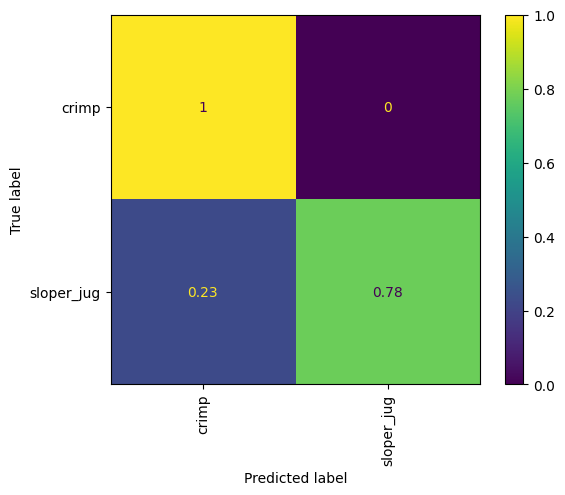

              precision    recall  f1-score   support

       crimp       0.82      1.00      0.90        40
  sloper_jug       1.00      0.78      0.87        40

    accuracy                           0.89        80
   macro avg       0.91      0.89      0.89        80
weighted avg       0.91      0.89      0.89        80



Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  6.47it/s]


# Model 1

accuracy: 0.9125


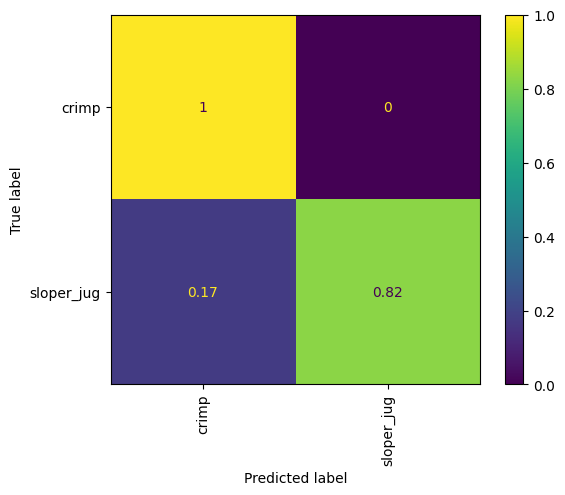

              precision    recall  f1-score   support

       crimp       0.85      1.00      0.92        40
  sloper_jug       1.00      0.82      0.90        40

    accuracy                           0.91        80
   macro avg       0.93      0.91      0.91        80
weighted avg       0.93      0.91      0.91        80



Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  5.34it/s]


# Model 2

accuracy: 0.7375


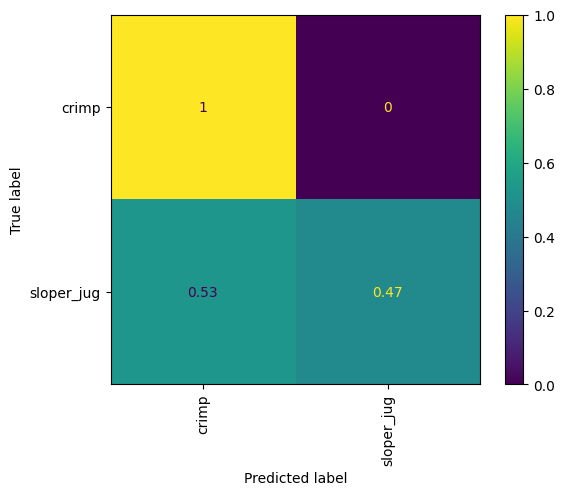

              precision    recall  f1-score   support

       crimp       0.66      1.00      0.79        40
  sloper_jug       1.00      0.47      0.64        40

    accuracy                           0.74        80
   macro avg       0.83      0.74      0.72        80
weighted avg       0.83      0.74      0.72        80



Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  5.20it/s]


# Model 3

accuracy: 0.9625


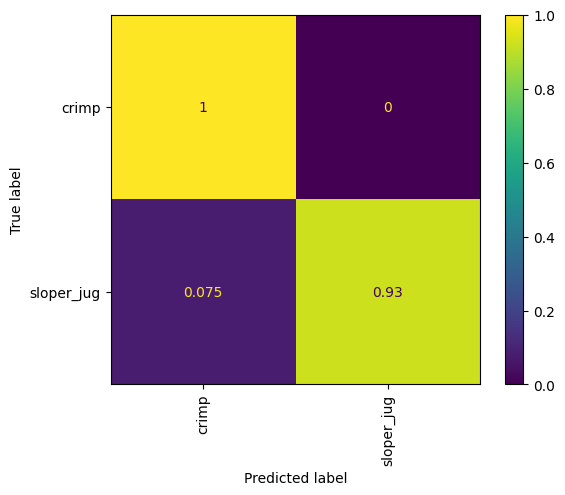

              precision    recall  f1-score   support

       crimp       0.93      1.00      0.96        40
  sloper_jug       1.00      0.93      0.96        40

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  5.69it/s]


# Model 4

accuracy: 0.8375


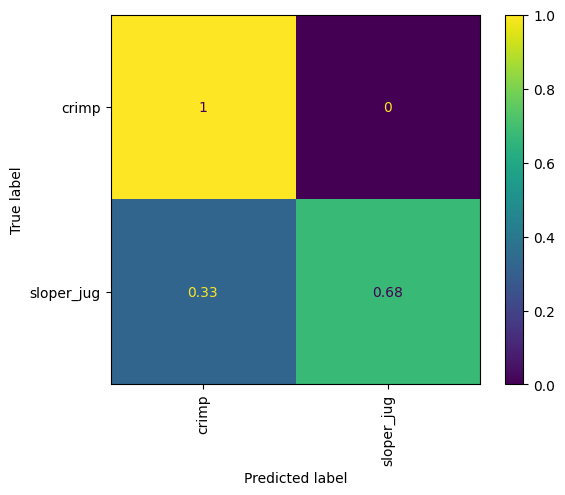

              precision    recall  f1-score   support

       crimp       0.75      1.00      0.86        40
  sloper_jug       1.00      0.68      0.81        40

    accuracy                           0.84        80
   macro avg       0.88      0.84      0.83        80
weighted avg       0.88      0.84      0.83        80



In [5]:
accuracies = list()
for n, model in enumerate(models):
    data, labels = dataset.get_test()
    pred = model.predict(data)
    report_cm(f'Model {n}', labels, pred, model.named_steps['classifier'].classes_)
    print(classification_report(labels, pred))
    accuracies.append(accuracy_score(labels, pred))
pd.Series(accuracies, name='Random Forest').to_csv(os.path.join(model_dir, 'random-forest.csv'))